In [4]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score
# import xgboost as xgb
# import matplotlib.pyplot as plt
# import seaborn as sns
 
# # Load the dataset
# df = pd.read_csv('Ranked_data.csv')

# # Prepare the features and target
# X = df.drop(['Unnamed: 0', 'striker', 'Overall_score','Rank'], axis=1)
# y = df['Overall_score']


# # Encode categorical variables
# le = LabelEncoder()
# X['Player_type'] = le.fit_transform(X['Player_type'])

# # Scale numerical features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Define the parameter grid for RandomizedSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [3, 4, 5, 6, 7, 8],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'min_child_weight': [1, 2, 3, 4, 5]
# }

# # Initialize the XGBoost model
# xgb_model = xgb.XGBRegressor(random_state=42)

# # Perform RandomizedSearchCV
# xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, 
#                                 n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
# xgb_random.fit(X_train, y_train)

# # Get the best model
# best_xgb_model = xgb_random.best_estimator_

# # Make predictions
# y_pred = best_xgb_model.predict(X_test)

# # Calculate metrics
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared Score: {r2}")
# print(f"Accuracy: {r2 * 100:.2f}%")
# Mean Squared Error: 3.2368407639578782
# R-squared Score: 0.9929700047376909
# Accuracy: 99.30%

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
df = pd.read_csv('Ranked_data.csv')

In [7]:
df.columns.tolist()

['Unnamed: 0',
 'striker',
 'totalrunsscored',
 'Total_batting_average',
 'batting_strike_rate',
 'totalballsfaced',
 'totalwickets',
 'economyrate',
 'oversbowled_clean',
 'totalrunsscored_norm',
 'Total_batting_average_norm',
 'batting_strike_rate_norm',
 'totalwickets_norm',
 'economyrate_norm',
 'Player_type',
 'Overall_score',
 'Rank']

In [8]:
# Prepare the features and target
X = df.drop(['Unnamed: 0', 'striker', 'Overall_score','Rank','totalrunsscored',
 'Total_batting_average',
 'batting_strike_rate',
 'totalballsfaced',
 'totalwickets',
 'economyrate',
 'oversbowled_clean'], axis=1)
y = df['Overall_score']

In [9]:

# Encode categorical variables
le = LabelEncoder()
X['Player_type'] = le.fit_transform(X['Player_type'])

In [10]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

This splits the data into training (80%) and testing (20%) sets.

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


This defines the hyperparameter space to search. Each parameter affects the model differently:
n_estimators: number of boosting rounds
max_depth: maximum depth of trees
learning_rate: step size shrinkage used to prevent overfitting
subsample: fraction of samples used for fitting the individual trees
colsample_bytree: fraction of features used for building each tree
min_child_weight: minimum sum of instance weight needed in a child
Model Initialization and Hyperparameter Tuning:

In [12]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5]
}

In [13]:
# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_random.fit(X_train, y_train)

This initializes the XGBoost model and uses RandomizedSearchCV to perform hyperparameter tuning. It will try 100 random combinations of hyperparameters, using 5-fold cross-validation for each.
Best Model Selection and Prediction:

In [14]:
# Perform RandomizedSearchCV
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, 
                                n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, verbose=2)

In [15]:
# Get the best model
best_xgb_model = xgb_random.best_estimator_

# Make predictions
y_pred = best_xgb_model.predict(X_test)

In [16]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Accuracy: {r2 * 100:.2f}%")

Mean Squared Error: 2.488091339657733
R-squared Score: 0.9945961906669148
Accuracy: 99.46%


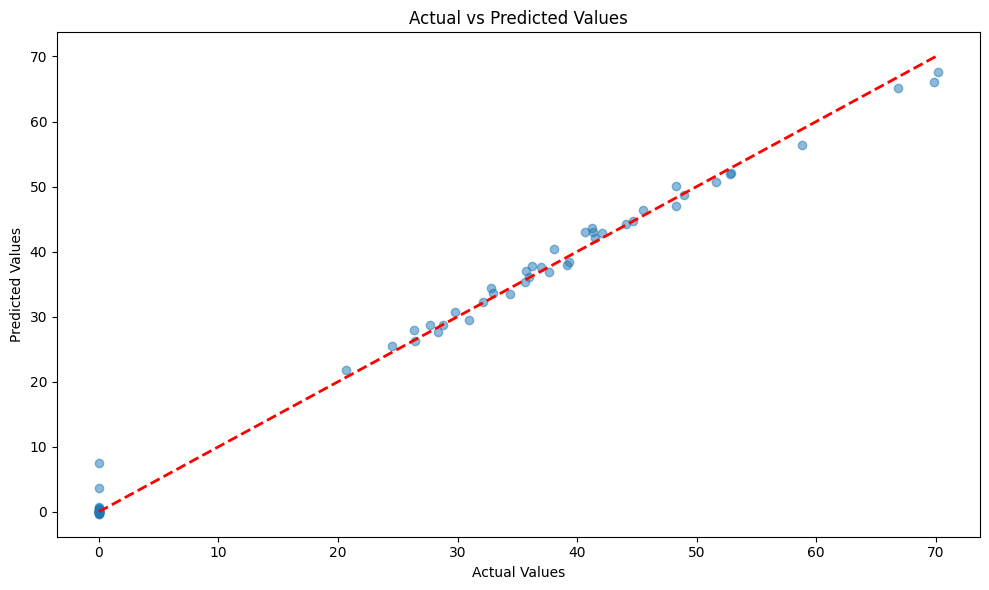

In [17]:

# 1. Actual vs Predicted values scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

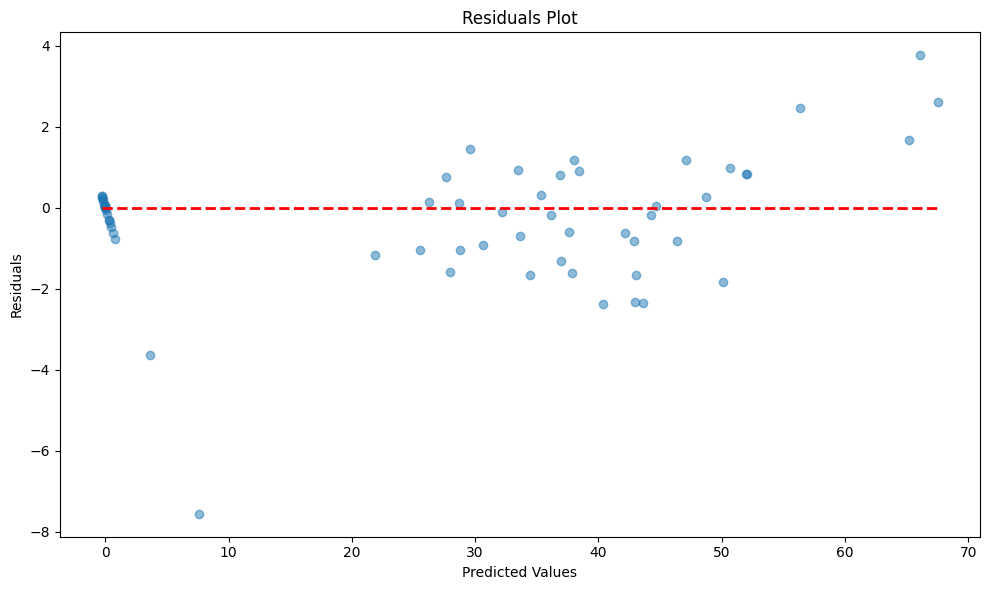

In [18]:
# 2. Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.plot([y_pred.min(), y_pred.max()], [0, 0], 'r--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.tight_layout()
plt.show()

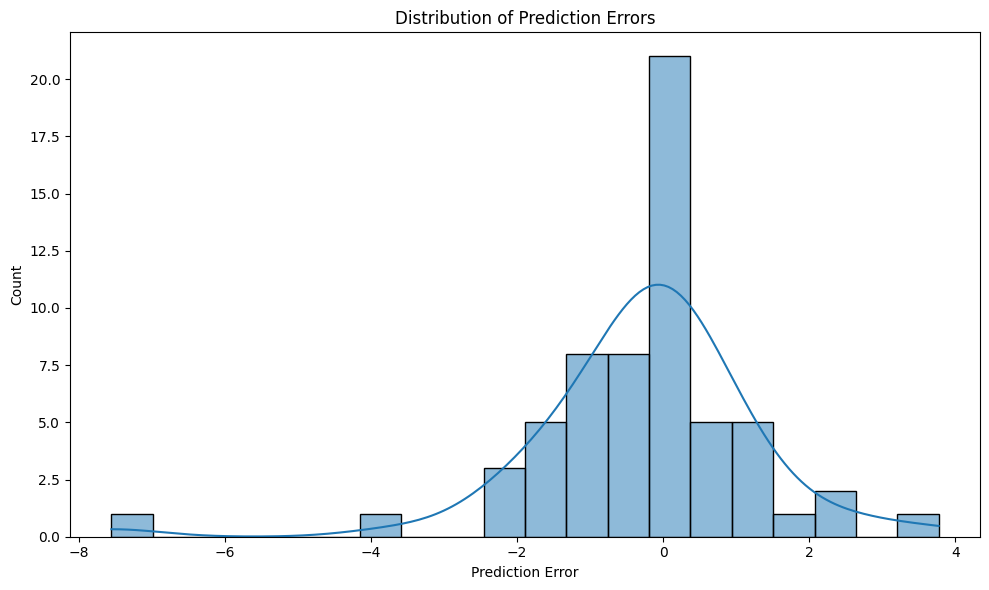

In [19]:
# 4. Prediction error distribution histogram
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.tight_layout()
plt.show()

This Gradient Boosting Regression approach uses XGBoost, which is known for its speed and performance. The hyperparameter tuning process helps to find the optimal model configuration for your specific dataset, potentially leading to better predictions compared to using default parameters.

In [20]:
# example_data = pd.read_csv("Ranked_data_with_wk.csv")
# example_data.columns.to_list()

Score calculation and normalization

In [29]:
test_data = pd.read_csv("Delhi_2024_data_cleaned.csv")

In [53]:

# Normalize metrics
metrics_to_normalize = ['totalrunsscored', 'Total_batting_average', 'batting_strike_rate', 'totalwickets']
for metric in metrics_to_normalize:
    test_data[f'{metric}_norm'] = (test_data[metric] - test_data[metric].min()) / (test_data[metric].max() - test_data[metric].min())

# Normalize economy rate (lower is better)
test_data['economyrate_norm'] = 1 - (test_data['economyrate'] - test_data['economyrate'].min()) / (test_data['economyrate'].max() - test_data['economyrate'].min())

# Assign weights
batting_weights = {
    'totalrunsscored_norm': 0.4,
    'Total_batting_average_norm': 0.3,
    'batting_strike_rate_norm': 0.3
}

bowling_weights = {
    'totalwickets_norm': 0.6,
    'economyrate_norm': 0.4
}

# Determine player type
def determine_player_type(row):
    if row['totalrunsscored'] >= 100 and row['totalwickets'] <= 2 and row['totalballsfaced'] >= 40:
        print("Inside")
        return 'Batsman'
    elif row['totalwickets'] > 5 and row['totalrunsscored'] <= 100:
        return 'Bowler'
    elif row['totalwickets'] >= 3 and row['totalrunsscored'] >= 100:
        return 'All-rounder'
    return 'Other Players'

test_data['Player_type'] = test_data.apply(determine_player_type, axis=1)

# Calculate scores based on player type
# def calculate_score(row):
#     if row['Player_type'] == 'Batsman':
#         return sum(row[metric] * weight for metric, weight in batting_weights.items()) * 100
#     elif row['Player_type'] == 'Bowler':
#         return sum(row[metric] * weight for metric, weight in bowling_weights.items()) * 100
#     elif row['Player_type'] == 'All-rounder':
#         batting_score = sum(row[metric] * weight for metric, weight in batting_weights.items()) * 100
#         bowling_score = sum(row[metric] * weight for metric, weight in bowling_weights.items()) * 100
#         return (batting_score + bowling_score) / 2
#     return 0
def calculate_score(row):
    print(row)
    if row['Player_type'] == 'Batsman':
        score = sum(row[metric] * weight for metric, weight in batting_weights.items()) * 100
        return score
    elif row['Player_type'] == 'Bowler':
        score = sum(row[metric] * weight for metric, weight in bowling_weights.items()) * 100
        return score
    elif row['Player_type'] == 'All-rounder':
        batting_score = sum(row[metric] * weight for metric, weight in batting_weights.items()) * 100
        bowling_score = sum(row[metric] * weight for metric, weight in bowling_weights.items()) * 100
        score = (batting_score + bowling_score) / 2
        return score
    return 0

test_data['Overall_score'] = test_data.apply(calculate_score, axis=1)

# Rank players within each category
test_data['Rank'] = test_data.groupby('Player_type')['Overall_score'].rank(ascending=False, method='min')


Inside
Inside
Inside
Inside
Inside
Inside
striker                       Rishabh Pant
totalrunsscored                        446
Total_batting_average                40.55
batting_strike_rate                  155.4
totalballsfaced                        287
totalwickets                             0
economyrate                            0.0
oversbowled_clean                        0
totalrunsscored_norm                   1.0
Total_batting_average_norm        0.750926
batting_strike_rate_norm          0.663989
totalwickets_norm                      0.0
economyrate_norm                       1.0
Player_type                        Batsman
Overall_score                     82.44745
Rank                                   1.0
Name: 0, dtype: object
striker                       Tristan Stubbs
totalrunsscored                          378
Total_batting_average                   54.0
batting_strike_rate                    190.9
totalballsfaced                          198
totalwickets          

In [46]:
# # Example data for prediction
# example_data = pd.DataFrame({
#     'totalrunsscored_norm': [0.22, 0.53, 0.02],
#     'Total_batting_average_norm': [0.32, 0.58, 0.13],
#     'batting_strike_rate_norm': [0.40, 0.49, 0.30],
#     'totalwickets_norm': [0.06, 0.02, 0.54],
#     'economyrate_norm': [0.68, 0.75, 0.82],
#     'Player_type': ['Batsman', 'Batsman', 'Bowler']
# })

# # Encode 'Player_type'
# example_data['Player_type'] = le.transform(example_data['Player_type'])

# # Scale the features
# example_data_scaled = scaler.transform(example_data)
# example_data_scaled = pd.DataFrame(example_data_scaled, columns=example_data.columns)

# # Make predictions
# predicted_scores = best_xgb_model.predict(example_data_scaled)

# # Add predictions to the example data
# example_data['Predicted_Overall_score'] = predicted_scores

# # Display results
# print(example_data[['Player_type', 'Predicted_Overall_score']])

In [24]:
data = pd.read_csv("test_data_calculated_score.csv")

In [42]:
data.columns.to_list()

['Unnamed: 0',
 'striker',
 'totalrunsscored',
 'Total_batting_average',
 'batting_strike_rate',
 'totalwickets',
 'economyrate',
 'totalballsfaced',
 'Balls Bowled',
 'oversbowled_clean',
 'totalrunsscored_norm',
 'Total_batting_average_norm',
 'batting_strike_rate_norm',
 'totalwickets_norm',
 'economyrate_norm',
 'Player_type',
 'Overall_score',
 'Rank']

In [54]:
test_data.columns.to_list()

['striker',
 'totalrunsscored',
 'Total_batting_average',
 'batting_strike_rate',
 'totalballsfaced',
 'totalwickets',
 'economyrate',
 'oversbowled_clean',
 'totalrunsscored_norm',
 'Total_batting_average_norm',
 'batting_strike_rate_norm',
 'totalwickets_norm',
 'economyrate_norm',
 'Player_type',
 'Overall_score',
 'Rank']

In [45]:
conditions = [
    test_data['Player_type'] == 0,
    test_data['Player_type'] == 1,
    test_data['Player_type'] == 2,
    test_data['Player_type'] == 3
]

choices = ['All-rounder', 'Batsman', 'Bowler', 'Other Players']

test_data['Player_type'] = np.select(conditions, choices, default='Unknown')

In [55]:
test_data.head()

,striker,totalrunsscored,Total_batting_average,batting_strike_rate,totalballsfaced,totalwickets,economyrate,oversbowled_clean,totalrunsscored_norm,Total_batting_average_norm,batting_strike_rate_norm,totalwickets_norm,economyrate_norm,Player_type,Overall_score,Rank
0,Rishabh Pant,446,40.55,155.40,287,0,0.00,0,1.000000,0.750926,0.663989,0.000000,1.000000,Batsman,82.447450,1.0
1,Tristan Stubbs,378,54.00,190.90,198,3,7.50,2,0.847534,1.000000,0.815673,0.176471,0.895833,All-rounder,67.396545,1.0
2,Jake Fraser - McGurk,330,36.67,234.04,141,0,0.00,0,0.739910,0.679074,1.000000,0.000000,1.000000,Batsman,79.968635,2.0
3,Abishek Porel,327,32.70,159.51,205,0,0.00,0,0.733184,0.605556,0.681550,0.000000,1.000000,Batsman,67.940526,3.0
4,Axar Patel,235,29.38,131.28,179,11,7.65,44,0.526906,0.544074,0.560930,0.647059,0.893750,All-rounder,64.399939,2.0


In [56]:
# Transform your dataset for prediction
example_data = pd.DataFrame({
    'totalrunsscored_norm': test_data['totalrunsscored_norm'],
    'Total_batting_average_norm': test_data['Total_batting_average_norm'],
    'batting_strike_rate_norm': test_data['batting_strike_rate_norm'],
    'totalwickets_norm': test_data['totalwickets_norm'],
    'economyrate_norm': test_data['economyrate_norm'],
    'Player_type': test_data['Player_type'] 
})
# example_data.head()

# # Encode 'Player_type'
example_data['Player_type'] = le.transform(example_data['Player_type'])

# Scale the features
example_data_scaled = scaler.transform(example_data)
example_data_scaled = pd.DataFrame(example_data_scaled, columns=example_data.columns)

# Make predictions
predicted_scores = best_xgb_model.predict(example_data_scaled)

# Add predictions to the example data
example_data['Predicted_Overall_score'] = predicted_scores

# Add player names to the example data
example_data['Player'] = test_data['striker']

# Display results
print(example_data[['Player','Predicted_Overall_score']])

                  Player  Predicted_Overall_score
0           Rishabh Pant                70.069489
1         Tristan Stubbs                58.139206
2   Jake Fraser - McGurk                61.636425
3          Abishek Porel                60.689701
4             Axar Patel                56.546555
5           Prithvi Shaw                45.958649
6              Shai Hope                44.870392
7           David Warner                43.445335
8         Mitchell Marsh                10.727386
9          Kuldeep Yadav                57.190998
10          Rasikh Salam                40.407764
11         Gulbadin Naib                 1.873631
12           Sumit Kumar                 0.006853
13           Lalit Yadav                -0.261940
14         Anrich Nortje                52.347652
15          Mukesh Kumar                79.073982
16        Kumar Kushagra                 0.096818
17            Ricky Bhui                 0.251532
18       Jhye Richardson                -0.227229


In [ ]:
# example_data.to_csv("xgboost_model_1_kkr_data2024_prediction.csv")

C:\Users\niran\AppData\Local\Temp\ipykernel_21860\1425705576.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='rf_1_Predicted_Overall_score', shade=True, label='Random Forest Predictions')
C:\Users\niran\AppData\Local\Temp\ipykernel_21860\1425705576.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='xg_boost_1_Predicted_Overall_score', shade=True, label='XGBoost Predictions')
C:\Users\niran\AppData\Local\Temp\ipykernel_21860\1425705576.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Overall_score_obtained', shade=True, label='Actual Scores')


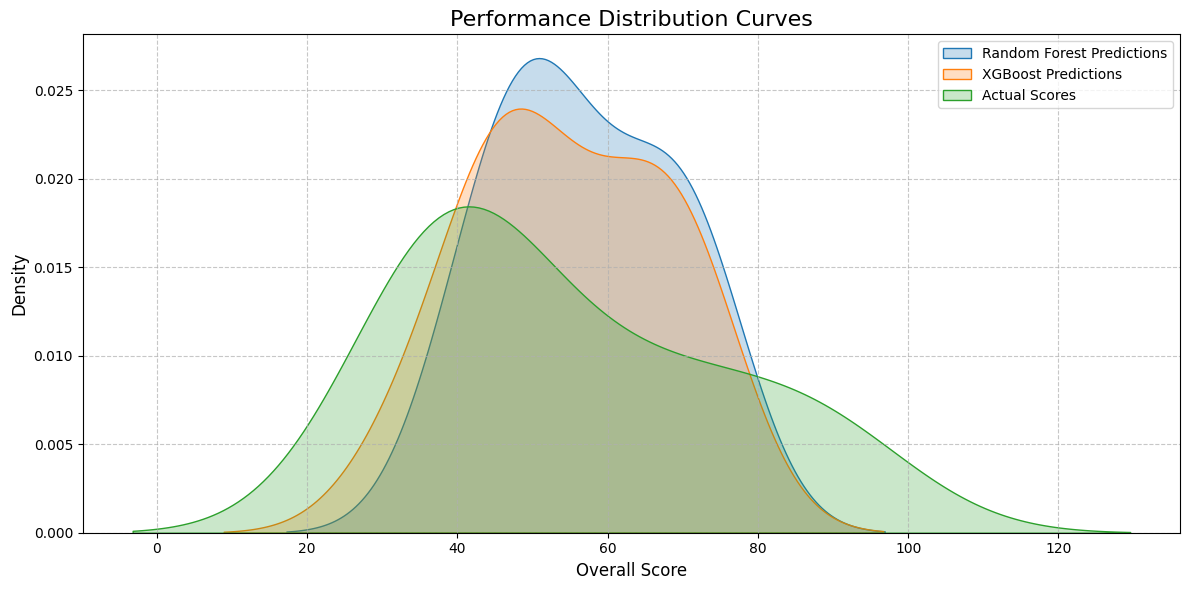

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame called 'df'
# If it's not, you'll need to create it from your data first

# Create the DataFrame if you haven't already
data = {
    'Player': ['Jos Buttler', 'Tymal Mills', 'Will Jacks', 'Liam Livingstone', 'Reece Topley', 
               'Dawid Malan', 'Sam Curran', 'Tom Abell', 'Adil Rashid', 'Harry Brook'],
    'rf_1_Predicted_Overall_score': [68.40700315, 74.50774429, 51.35719062, 48.25745156, 70.82660776, 
                                     57.29453392, 44.74423243, 39.63716106, 63.22290778, 51.47323937],
    'xg_boost_1_Predicted_Overall_score': [70.39937, 72.09699, 45.95546, 44.136646, 67.81441, 
                                           61.69961, 46.41379, 33.50635, 48.7163, 57.242996],
    'Overall_score_obtained': [90.6347685, 64.34782609, 38.51638457, 37.59940597, 46.90217391, 
                               67.5910405, 35.70574996, 36.35833785, 44.89130435, 83.72340426]
}

df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the distributions
sns.kdeplot(data=df, x='rf_1_Predicted_Overall_score', shade=True, label='Random Forest Predictions')
sns.kdeplot(data=df, x='xg_boost_1_Predicted_Overall_score', shade=True, label='XGBoost Predictions')
sns.kdeplot(data=df, x='Overall_score_obtained', shade=True, label='Actual Scores')

# Customize the plot
plt.title('Performance Distribution Curves', fontsize=16)
plt.xlabel('Overall Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Optional: Save the plot
# plt.savefig('performance_distribution_curves.png', dpi=300, bbox_inches='tight')

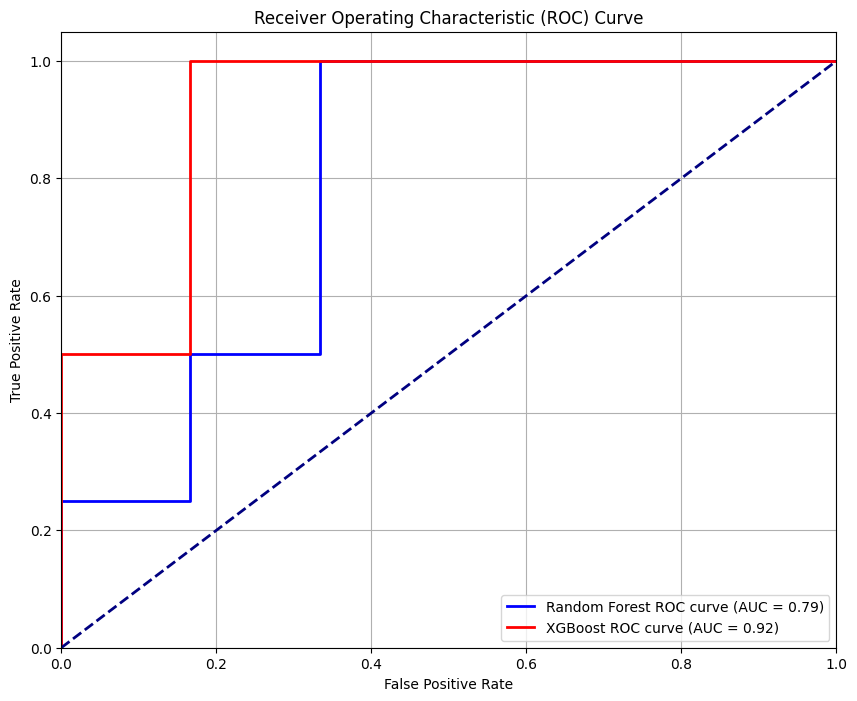

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have your data in a DataFrame called 'df'
# If not, create it like this:
data = {
    'Player': ['Jos Buttler', 'Tymal Mills', 'Will Jacks', 'Liam Livingstone', 'Reece Topley', 
               'Dawid Malan', 'Sam Curran', 'Tom Abell', 'Adil Rashid', 'Harry Brook'],
    'rf_1_Predicted_Overall_score': [68.40700315, 74.50774429, 51.35719062, 48.25745156, 70.82660776, 
                                     57.29453392, 44.74423243, 39.63716106, 63.22290778, 51.47323937],
    'xg_boost_1_Predicted_Overall_score': [70.39937, 72.09699, 45.95546, 44.136646, 67.81441, 
                                           61.69961, 46.41379, 33.50635, 48.7163, 57.242996],
    'Overall_score_obtained': [90.6347685, 64.34782609, 38.51638457, 37.59940597, 46.90217391, 
                               67.5910405, 35.70574996, 36.35833785, 44.89130435, 83.72340426]
}

df = pd.DataFrame(data)

# Function to calculate ROC curve and AUC
def calculate_roc(y_true, y_pred):
    # For ROC curve, we need binary classification
    # Let's consider scores above the mean as 'positive'
    y_true_binary = (y_true > y_true.mean()).astype(int)
    fpr, tpr, _ = roc_curve(y_true_binary, y_pred)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Calculate ROC curves
fpr_rf, tpr_rf, auc_rf = calculate_roc(df['Overall_score_obtained'], df['rf_1_Predicted_Overall_score'])
fpr_xgb, tpr_xgb, auc_xgb = calculate_roc(df['Overall_score_obtained'], df['xg_boost_1_Predicted_Overall_score'])

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest ROC curve (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost ROC curve (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()